# Practica Machine Learning
### Bernardo Koron
Se realizara un modelo de regresion para predecir el precio de los departamentos publicados en Airbnb.

In [1]:
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline


### Carga y preparacion de datos, division en train-test.

In [2]:
airbnb = pd.read_csv("./airbnb-listings-extract.csv", sep = ';')
print(list(airbnb.columns))
print(f'\nInitial number of rows: {len(airbnb)}')
print(f'\ndtypes: \n{airbnb.dtypes}')


['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Max

In [3]:
airbnb = airbnb[airbnb["City"]=="Madrid"]

print(f'Inputs placed in Madrid: {len(airbnb)}')

Inputs placed in Madrid: 13207


In [4]:
airbnb.iloc[0:4,0:40].T

,40,41,42,43
ID,6478626,4941335,12510355,4756811
Listing Url,https://www.airbnb.com/rooms/6478626,https://www.airbnb.com/rooms/4941335,https://www.airbnb.com/rooms/12510355,https://www.airbnb.com/rooms/4756811
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,Habitación con baño .,Cómodo estudio en la calle Goya,Studio & Terrace - Barrio Salamanca,Cute single room -private bathroom
Summary,"Habitación con cama de 150 , para una o dos p...",Bonito estudio en el barrio comercial y financ...,"Bright and refurbished studio, located in one ...",Nice single room in the best area of Madrid. T...
Space,Tranquilidad y respeto del espacio room with b...,"Este estudio, regentado por Marta y Marcos, ha...","Bright and refurbished studio, located in one ...",NaN
Description,"Habitación con cama de 150 , para una o dos p...",Bonito estudio en el barrio comercial y financ...,"Bright and refurbished studio, located in one ...",Nice single room in the best area of Madrid. T...
Experiences Offered,none,none,none,none
Neighborhood Overview,"Barrio muy bien comunicado , metro , autobús ,...",NaN,"The Studio is located in a quiet street, in th...",NaN


In [5]:
# List of elements considered to be relevant
# columns_to_keep = ['Price','City','Room Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Square Feet','Guests Included','Extra People','Review Scores Rating']
columns_to_keep = ['Price','Accommodates','Bathrooms','Bedrooms','Beds','Square Feet','Guests Included','Extra People','Review Scores Rating']
airbnb = airbnb[columns_to_keep]

# Aplicar este filtro luego de separar en train y test
# airbnb = airbnb[airbnb['Square Meters'] > 20]

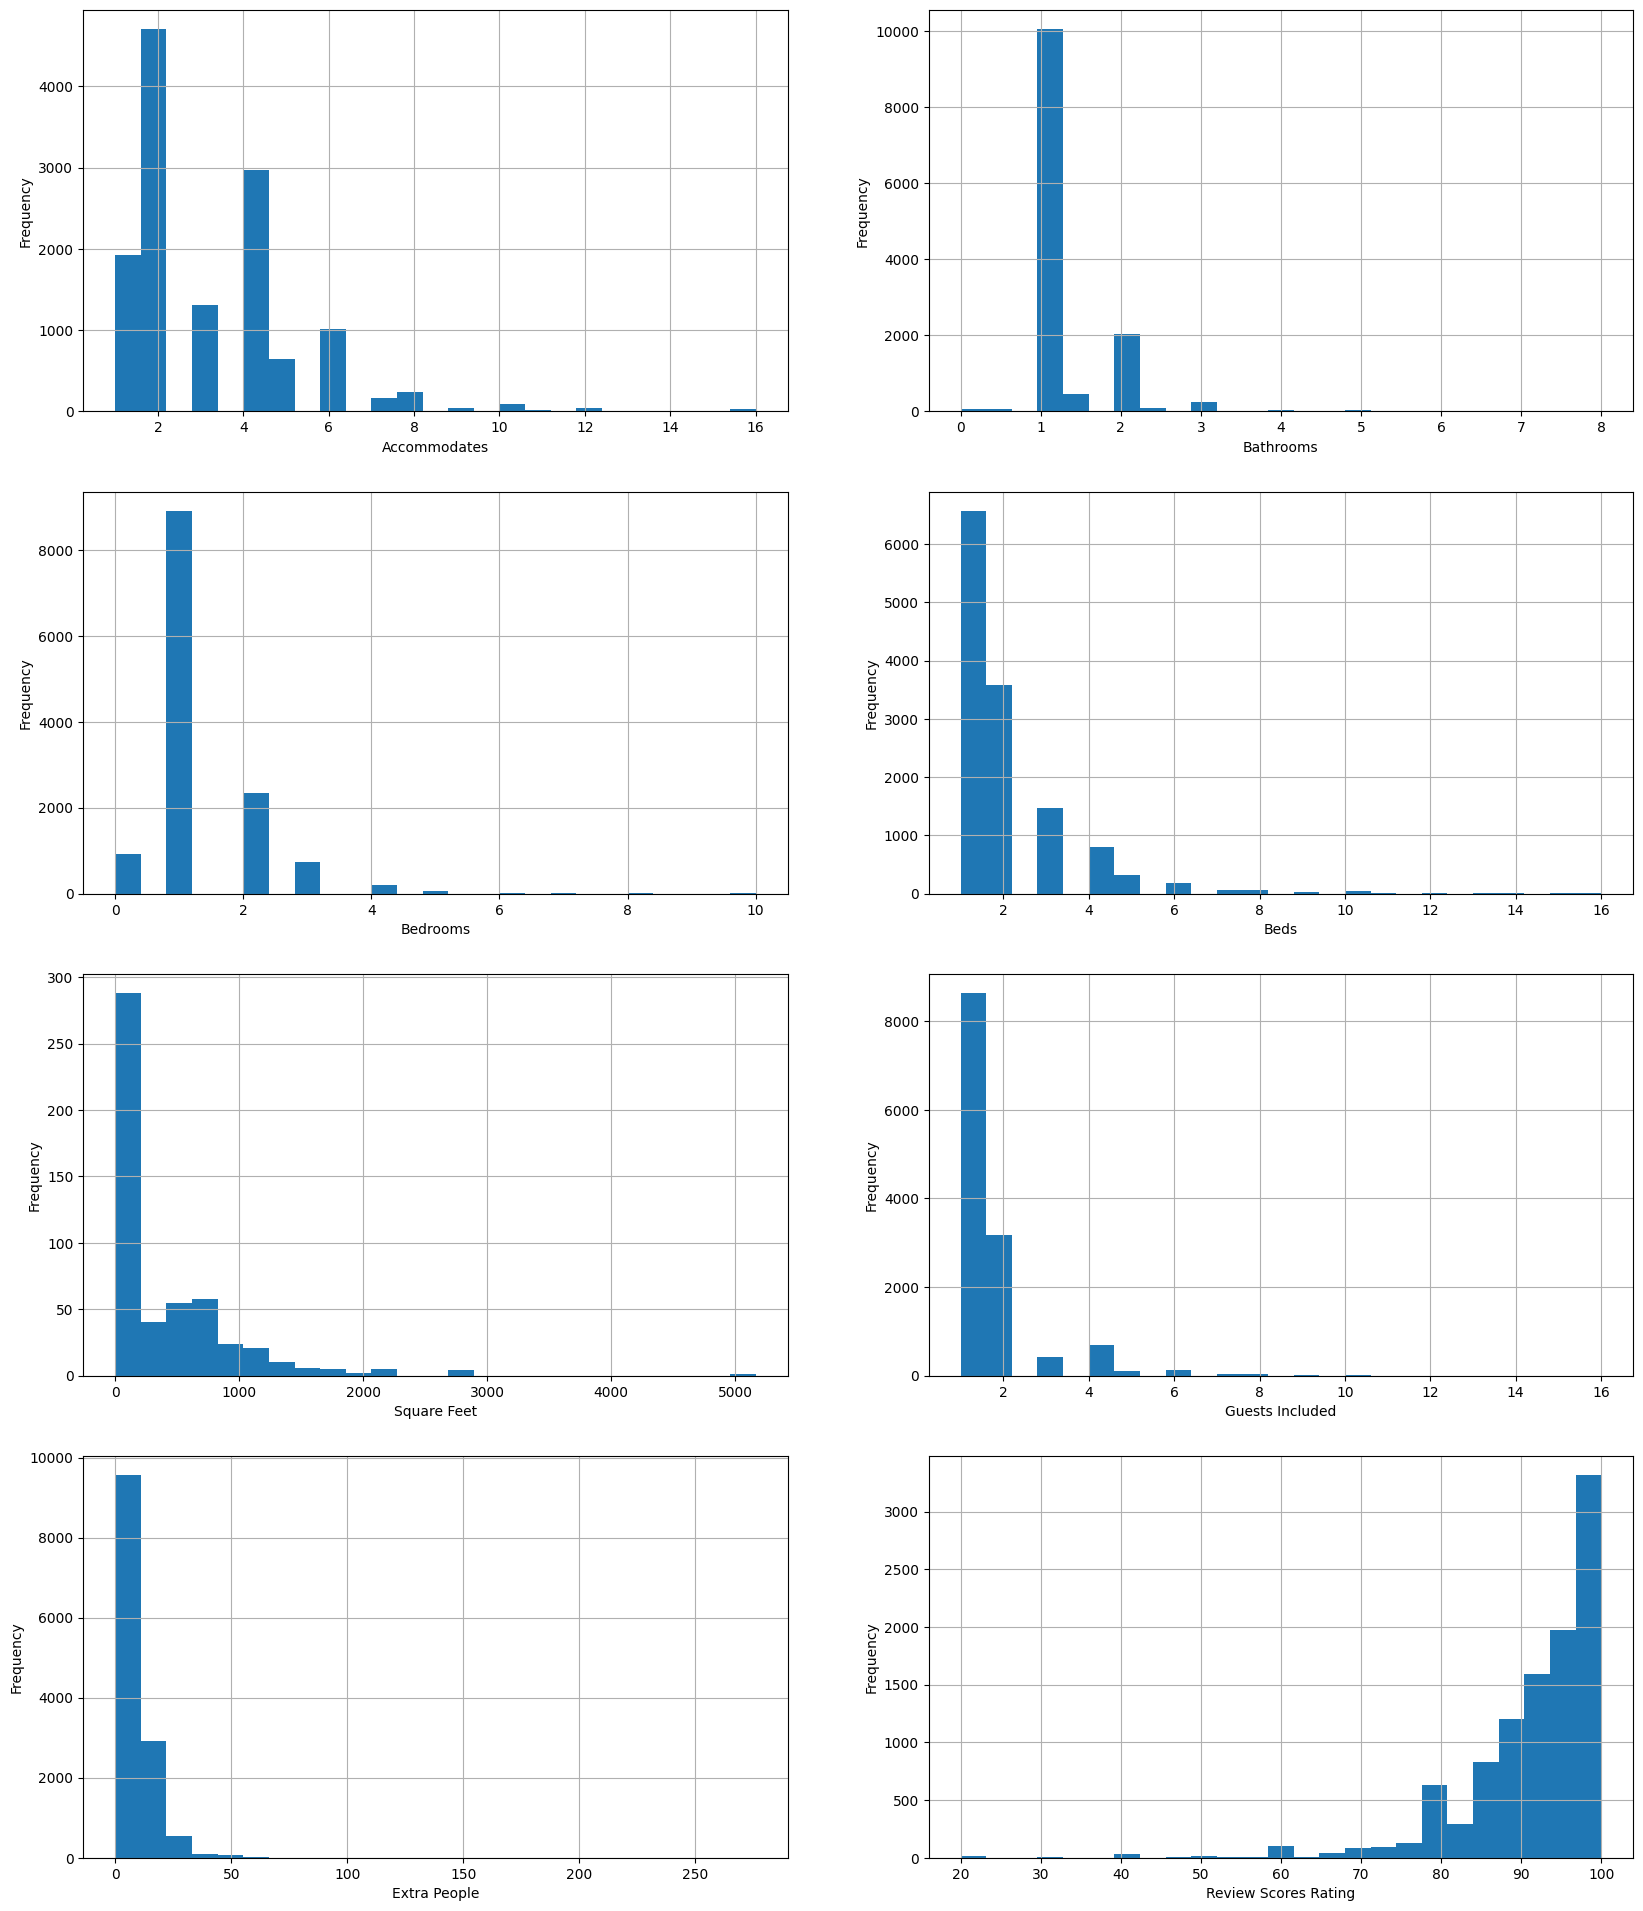

In [6]:
plt.figure(figsize=(20, 24))

for i, col_name in enumerate(columns_to_keep[1:]):
    plt.subplot(4,2,1+i)
    airbnb[col_name].plot.hist(bins=25, grid = True)
    #airbnb[col_name].plot.density(alpha=0.5, grid = True)
    plt.xlabel(col_name)
plt.show()



In [7]:
features_to_transform = ['Accommodates']

for feature in features_to_transform:
    airbnb[feature] = airbnb[feature].apply(lambda x: np.log10(x))

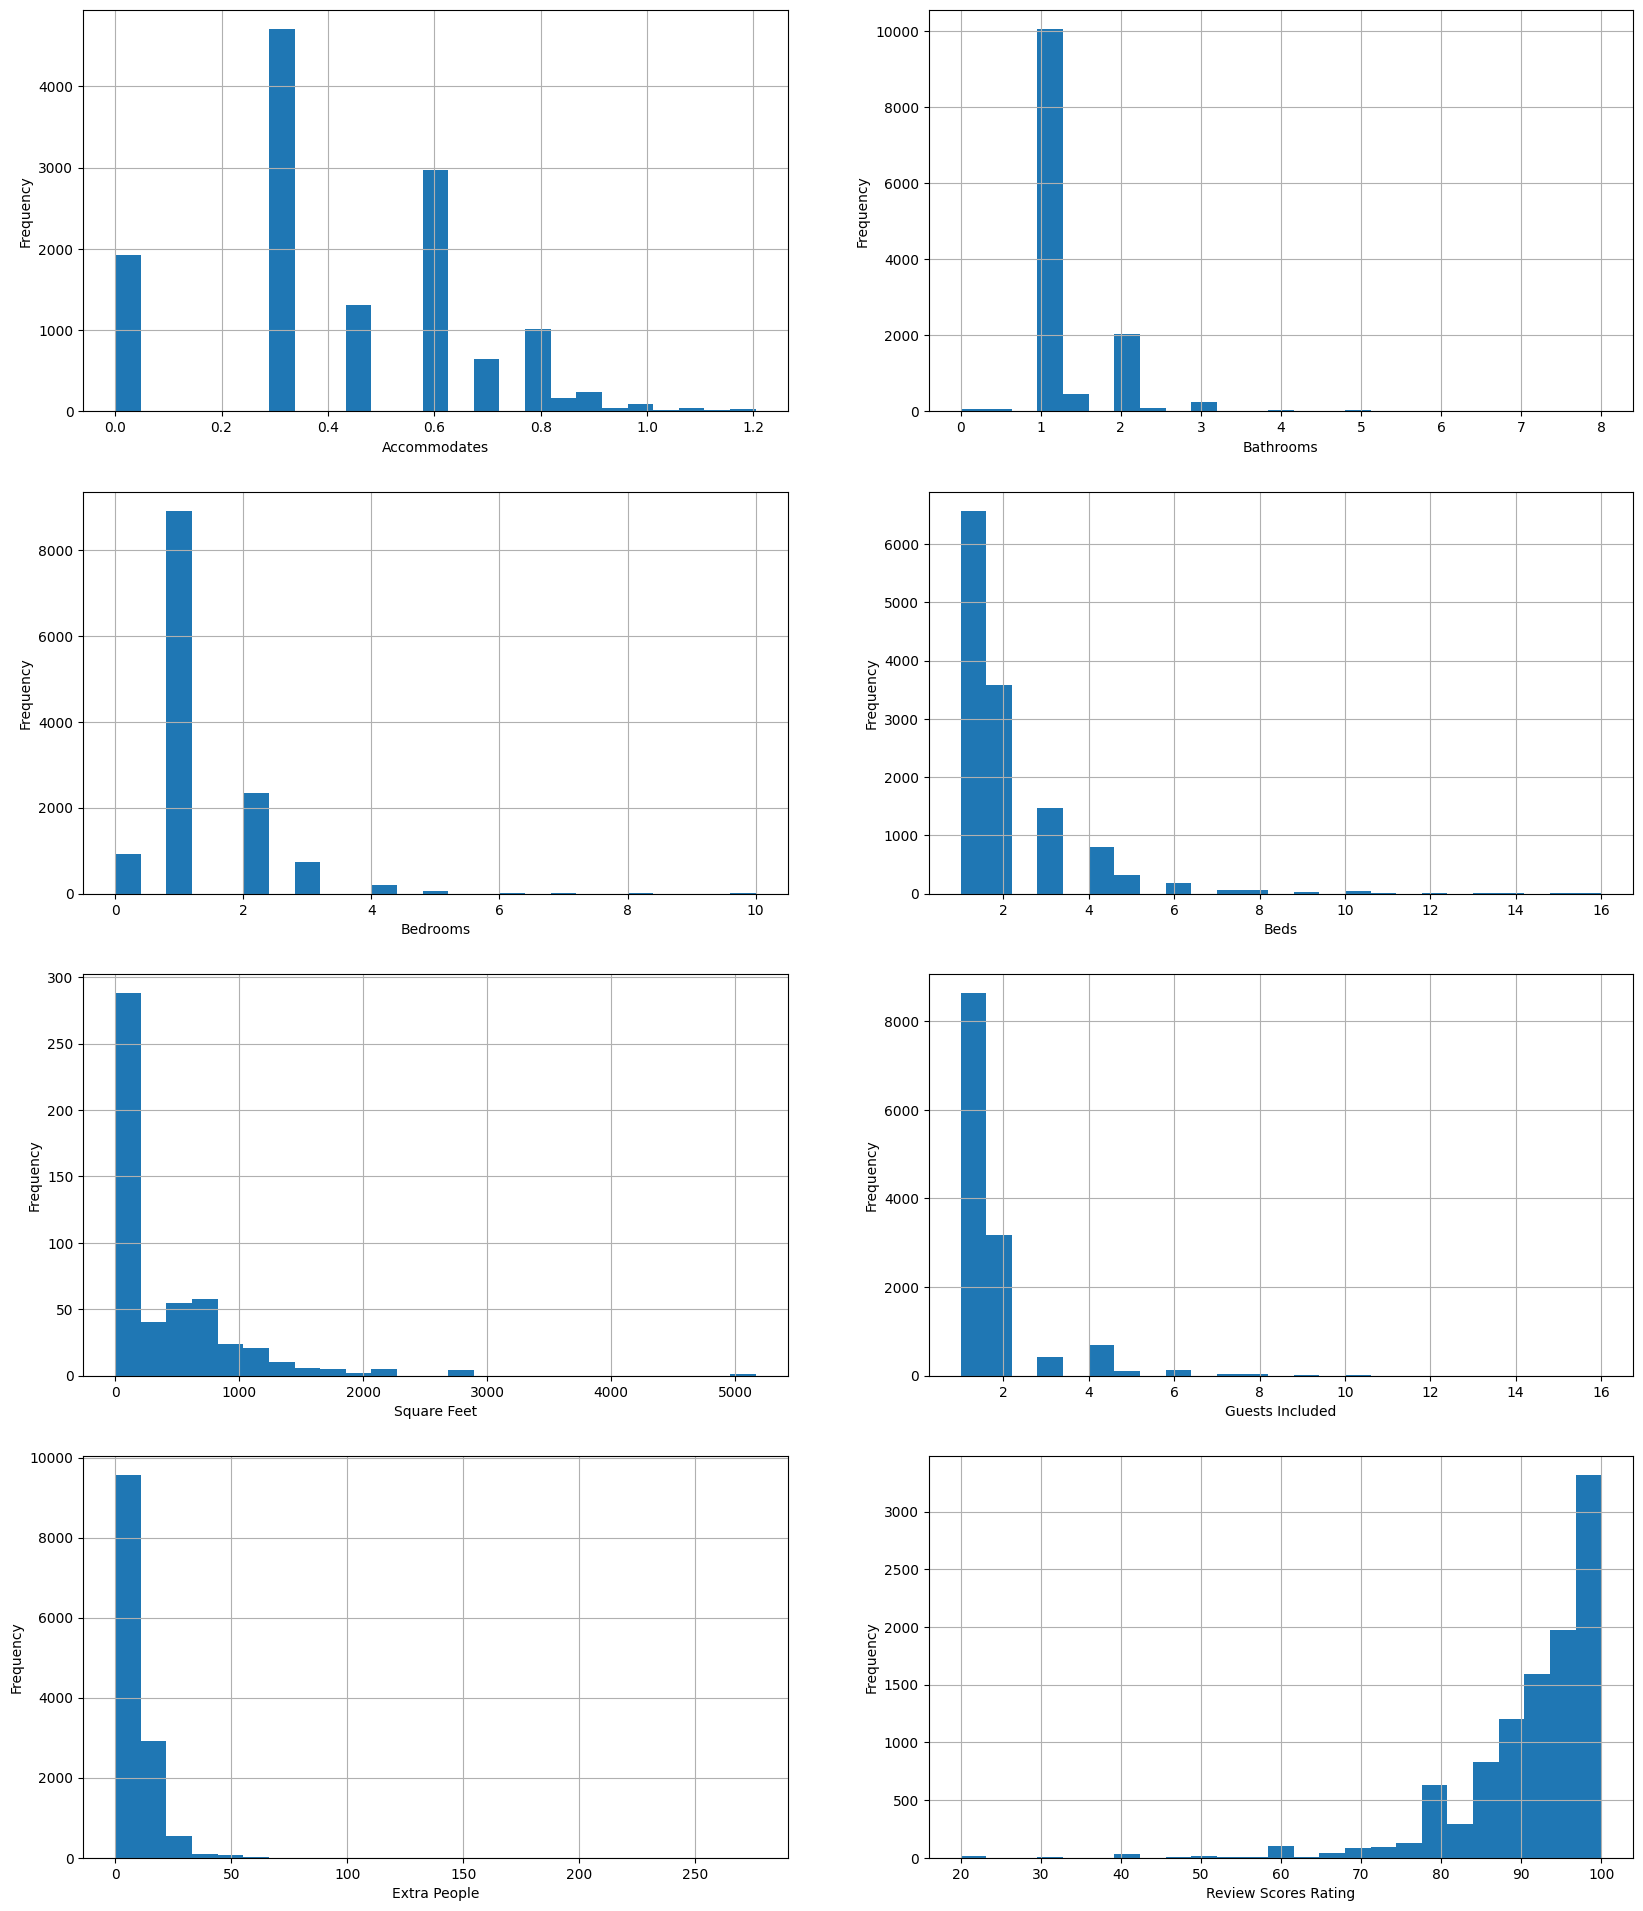

In [8]:
plt.figure(figsize=(20, 24))

for i, col_name in enumerate(columns_to_keep[1:]):
    plt.subplot(4,2,1+i)
    airbnb[col_name].plot.hist(bins=25, grid = True)
    #airbnb[col_name].plot.density(alpha=0.5, grid = True)
    plt.xlabel(col_name)
plt.show()

In [9]:
# Check the percentage of missing values for each column
airbnb.notnull().mean().mul(100).sort_values(ascending=False)

Accommodates            100.000000
Guests Included         100.000000
Extra People            100.000000
Price                    99.931854
Bedrooms                 99.825850
Bathrooms                99.628985
Beds                     99.628985
Review Scores Rating     78.511395
Square Feet               3.929734
dtype: float64

In [10]:
# We can see that "Square feet" has less than 4% of values so this column will be deleted.
airbnb.drop('Square Feet', axis=1, inplace=True)

In [11]:
# to check that all types are correct
airbnb.dtypes

Price                   float64
Accommodates            float64
Bathrooms               float64
Bedrooms                float64
Beds                    float64
Guests Included           int64
Extra People              int64
Review Scores Rating    float64
dtype: object

In [12]:
# imputation of missing values
airbnb["Price"].fillna(airbnb["Price"].mean(), inplace=True)
airbnb["Bedrooms"].fillna(airbnb["Bedrooms"].mode()[0], inplace=True)
airbnb["Bathrooms"].fillna(airbnb["Bathrooms"].mode()[0], inplace=True)
airbnb["Beds"].fillna(airbnb["Beds"].mode()[0], inplace=True)
airbnb["Review Scores Rating"].fillna(airbnb["Review Scores Rating"].mean(), inplace=True)

In [13]:
print(airbnb.notnull().mean().mul(100).sort_values(ascending=False))
print(len(airbnb))

Price                   100.0
Accommodates            100.0
Bathrooms               100.0
Bedrooms                100.0
Beds                    100.0
Guests Included         100.0
Extra People            100.0
Review Scores Rating    100.0
dtype: float64
13207


In [14]:
# Convert from pandas Data Frame to numpy array so it can be used by scikit-learn
data = airbnb.values

y = data[:,0:1]     # The first columns is Price
X = data[:,1:]      # All other columns

feature_names = airbnb.columns[1:]

In [15]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 1)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test)

Datos entrenamiento:  (9905, 7)
Datos test:  (3302, 7)


<div class="alert alert-block alert-success"> 
Modelo de regresion lineal utilizando Lasso con Cross Validation
</div> 

Fitting 10 folds for each of 50 candidates, totalling 500 fits
best mean cross-validation score: -1951.641
best parameters: {'alpha': 0.2442053094548651}


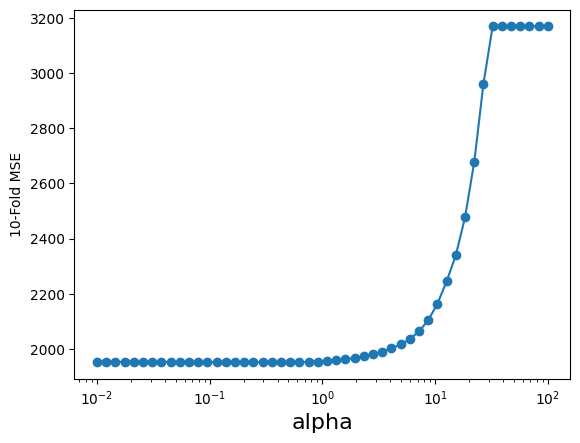

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-2,2,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring='neg_mean_squared_error', param_grid=param_grid, cv=10, verbose=1)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error


alpha_optimo = 0.01 #grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

print('\nCoefficients:')
w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 1.94e+03
MSE Modelo Lasso (test) : 1.75e+03
RMSE Modelo Lasso (train): 44
RMSE Modelo Lasso (test) : 41.9

Coefficients:
Accommodates 20.65756781819878
Bathrooms 8.969701384516952
Bedrooms 13.095099319749288
Beds -0.4586994888084244
Guests Included 3.808896384689361
Extra People -3.83880611288855
Review Scores Rating 3.7348727332754037


<div class="alert alert-block alert-success"> 
Ridge
</div>  

Fitting 10 folds for each of 50 candidates, totalling 500 fits
best mean cross-validation score: -1953.424
best parameters: {'alpha': 109.85411419875584}


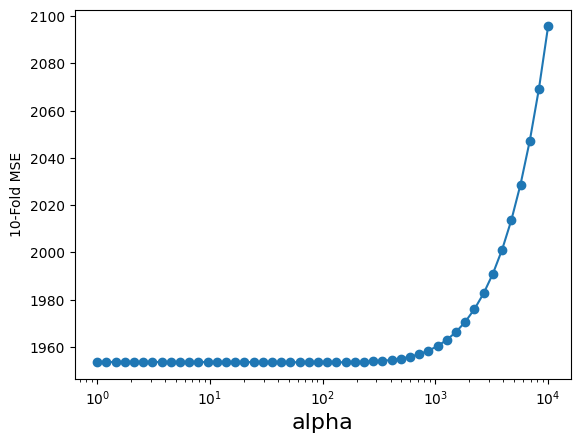

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha_vector = np.logspace(0,4,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Ridge(), scoring='neg_mean_squared_error', param_grid=param_grid, cv=10, verbose=1) 
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
ridge = Ridge(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainRidge = ridge.predict(XtrainScaled)
ytestRidge  = ridge.predict(XtestScaled)
mseTrainModelRidge = mean_squared_error(y_train,ytrainRidge)
mseTestModelRidge = mean_squared_error(y_test,ytestRidge)

print('MSE Modelo Ridge (train): %0.3g' % mseTrainModelRidge)
print('MSE Modelo Ridge (test) : %0.3g' % mseTestModelRidge)
print('RMSE Modelo Ridge (train): %0.3g' % np.sqrt(mseTrainModelRidge))
print('RMSE Modelo Ridge (test) : %0.3g' % np.sqrt(mseTestModelRidge))

print('\nCoefficients:')
w = ridge.coef_[0]
for f,wi in zip(feature_names,w):
    print(f,wi)


MSE Modelo Ridge (train): 1.94e+03
MSE Modelo Ridge (test) : 1.75e+03
RMSE Modelo Ridge (train): 44
RMSE Modelo Ridge (test) : 41.9

Coefficients:
Accommodates 20.263263211910395
Bathrooms 8.88390982092038
Bedrooms 12.948567878639555
Beds -0.11121177917478504
Guests Included 3.8815586543003366
Extra People -3.767231764579891
Review Scores Rating 3.7037188261992697


In [25]:
# RMSE Modelo Ridge (train): 44
# RMSE Modelo Ridge (test) : 42.2

<div class="alert alert-block alert-success"> Use green boxes sparingly, and only for some specific purpose that the other boxes can't cover. For example, if you have a lot of related content to link to, maybe you decide to use green boxes for related links from each section of a notebook. </div> 

<div class="alert alert-block alert-danger"> In general, just avoid the red boxes. </div> 